In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

Now lets convert the classifications to a 0 or zero

In [4]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [5]:
df["class"] = (df["class"] == "g").astype(int)

In [6]:
df["class"].unique()

array([1, 0])

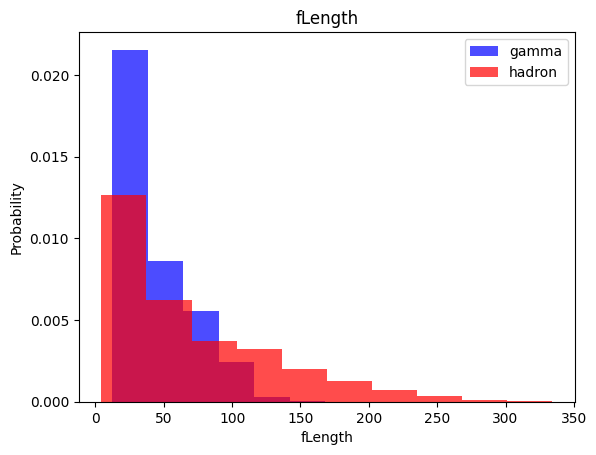

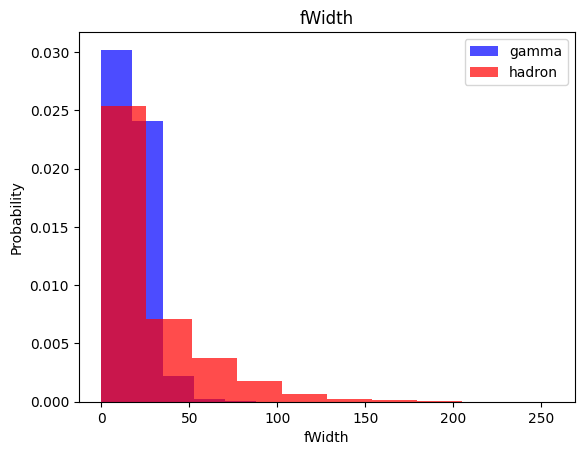

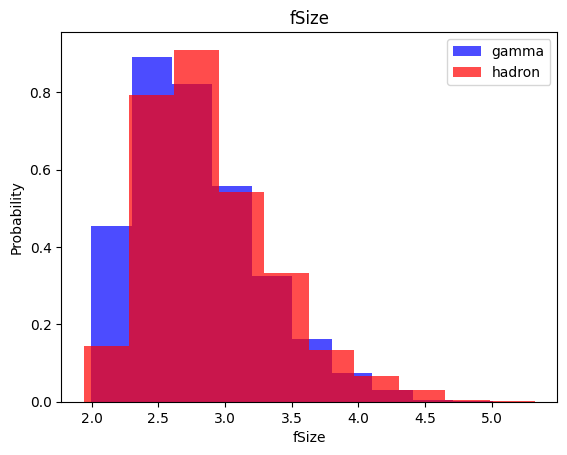

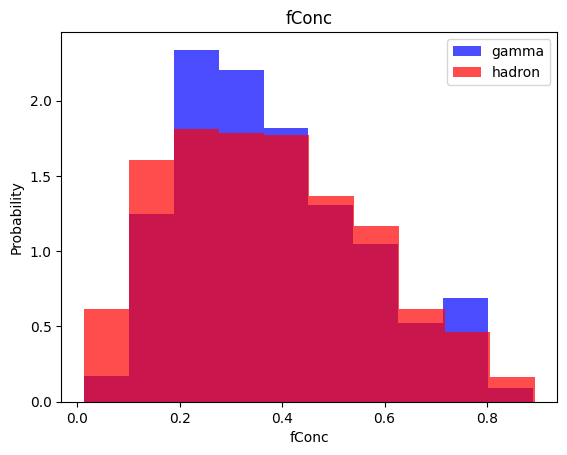

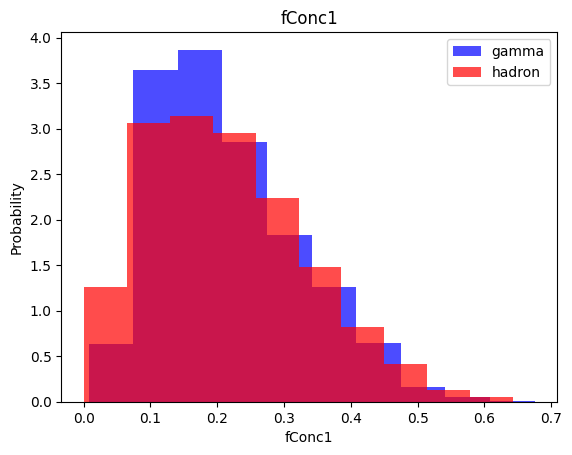

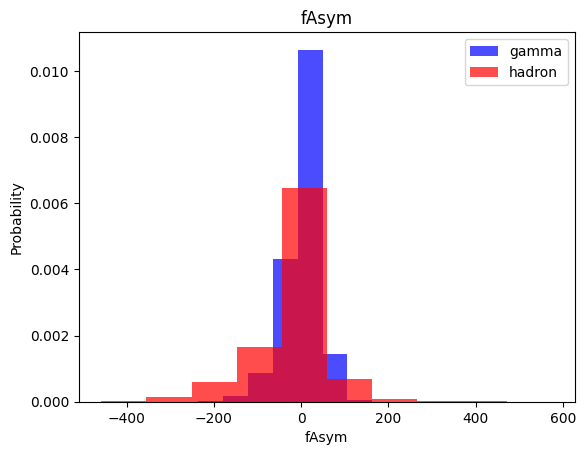

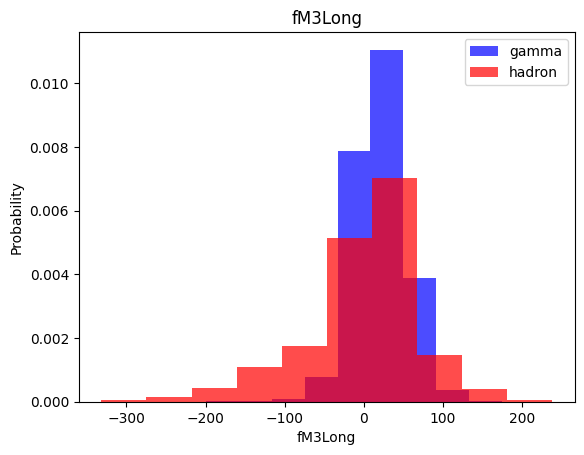

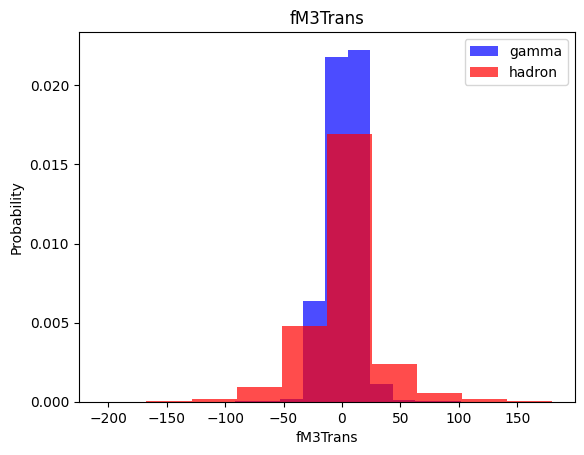

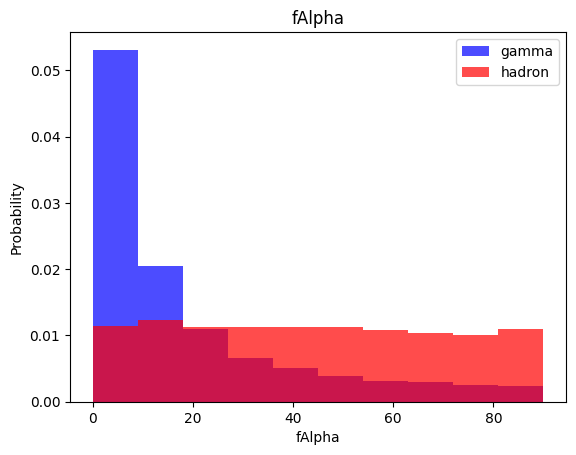

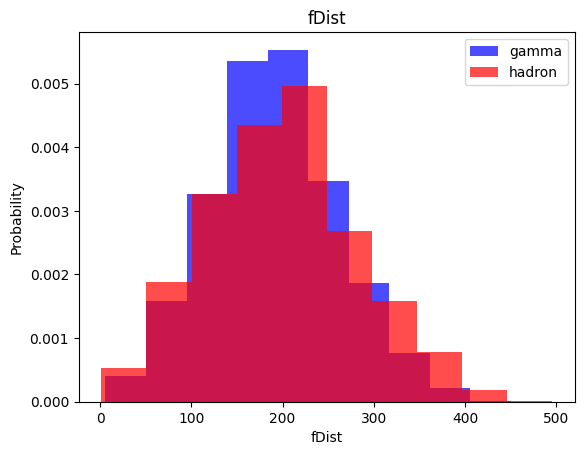

In [7]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Dataset Creation

In [8]:
#partition sets:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# Trying Out Different Models

## K nearest neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1310
           1       0.87      0.86      0.86      2494

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [15]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.51      1310
           1       0.74      0.89      0.81      2494

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [18]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1310
           1       0.85      0.81      0.83      2494

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machines

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [21]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1310
           1       0.89      0.90      0.90      2494

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [23]:
import tensorflow as tf

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [24]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [25]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


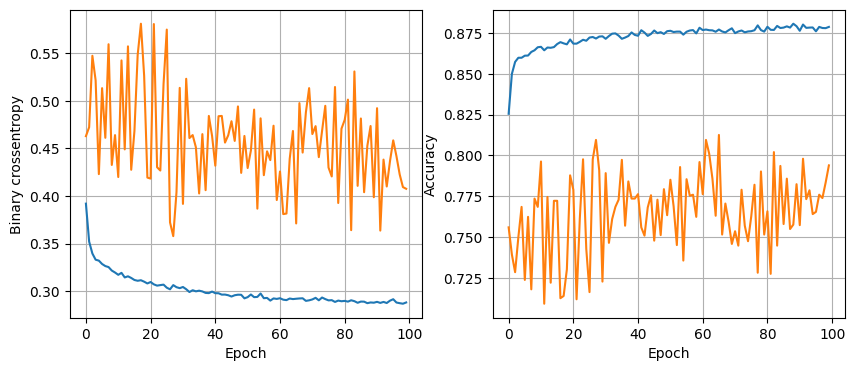

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8556 - loss: 0.3414
16 nodes, dropout 0, lr 0.01, batch size 64


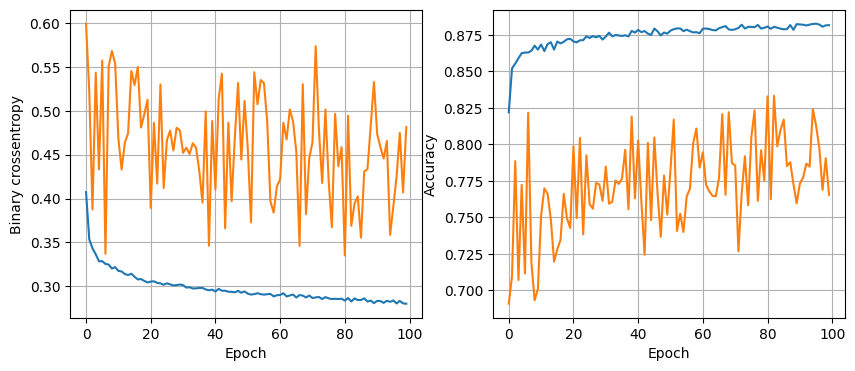

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.3530
16 nodes, dropout 0, lr 0.01, batch size 128


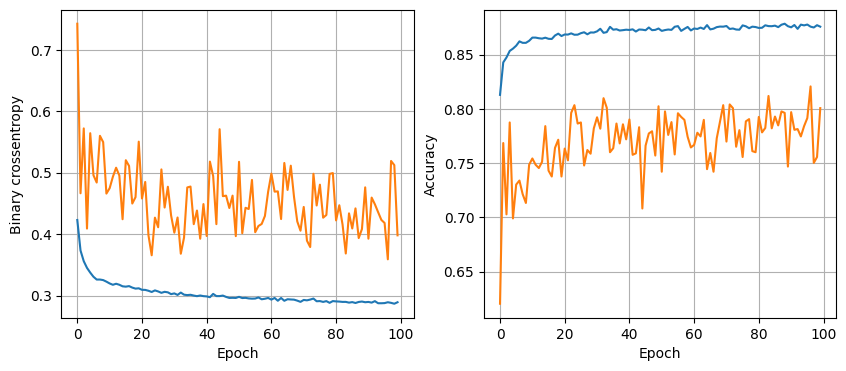

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8540 - loss: 0.3433
16 nodes, dropout 0, lr 0.005, batch size 32


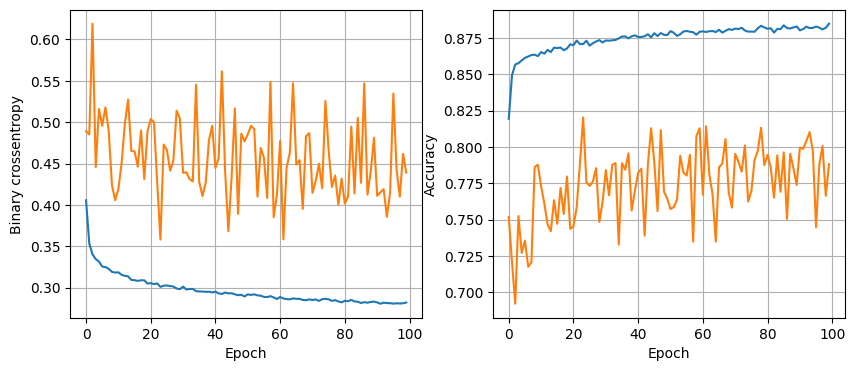

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.3277
16 nodes, dropout 0, lr 0.005, batch size 64


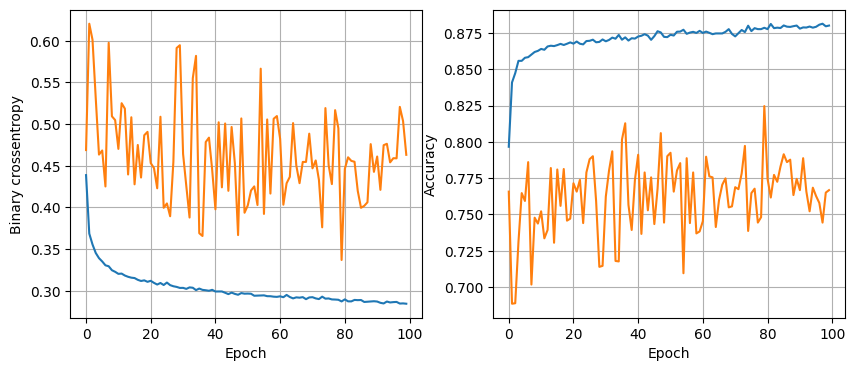

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3279
16 nodes, dropout 0, lr 0.005, batch size 128


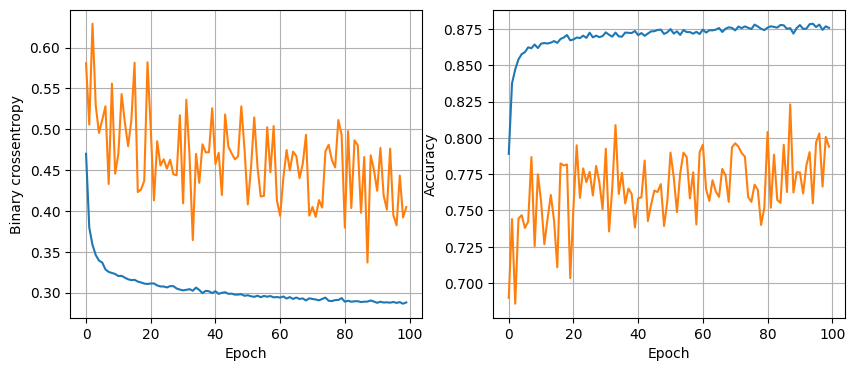

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3223
16 nodes, dropout 0, lr 0.001, batch size 32


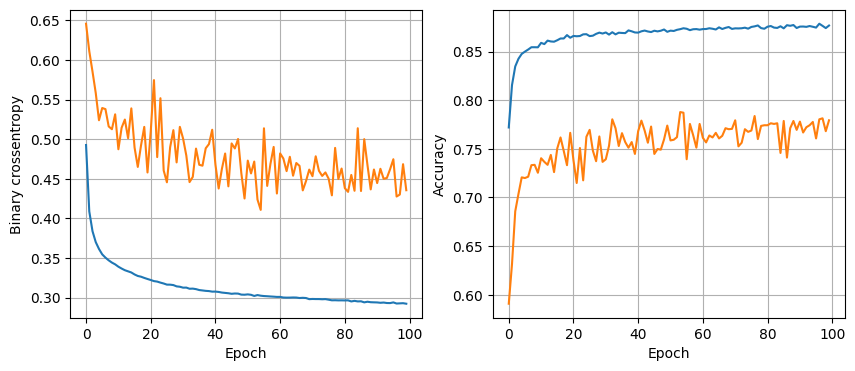

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.3223
16 nodes, dropout 0, lr 0.001, batch size 64


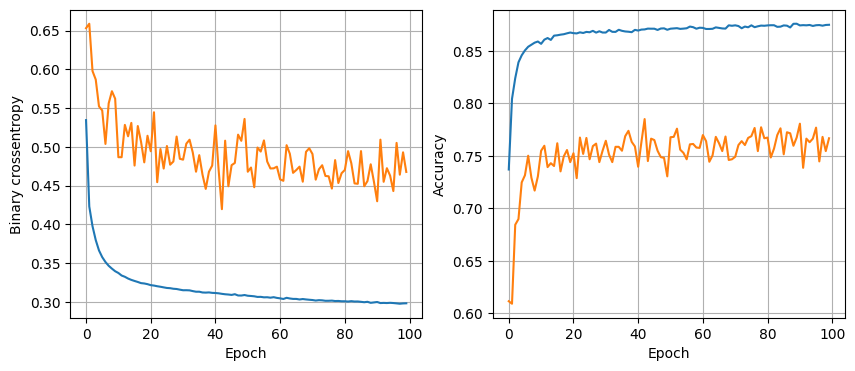

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3258
16 nodes, dropout 0, lr 0.001, batch size 128


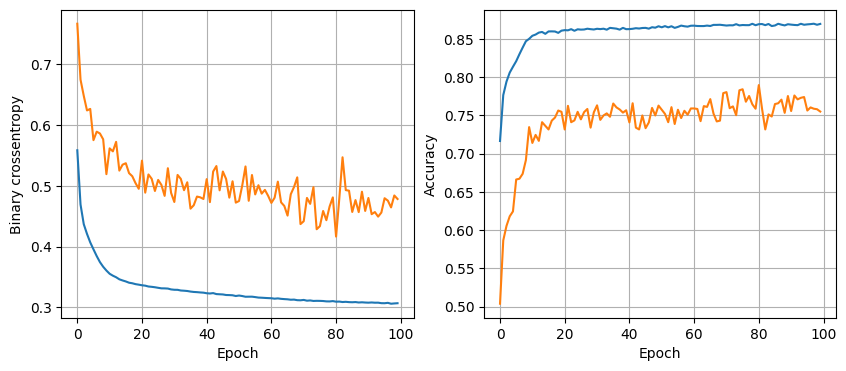

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8606 - loss: 0.3264
16 nodes, dropout 0.2, lr 0.01, batch size 32


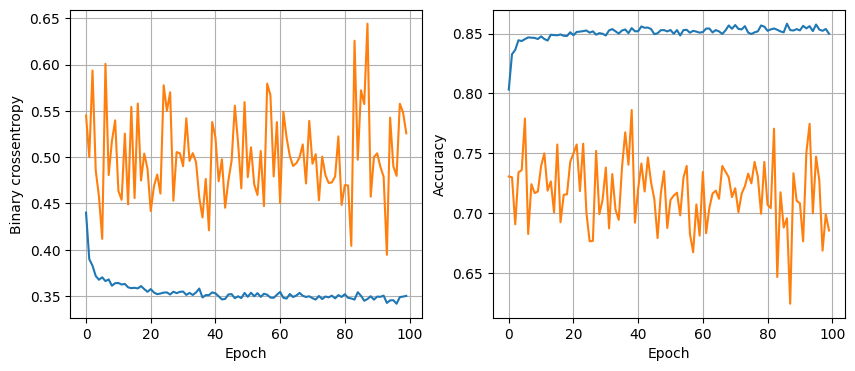

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3411
16 nodes, dropout 0.2, lr 0.01, batch size 64


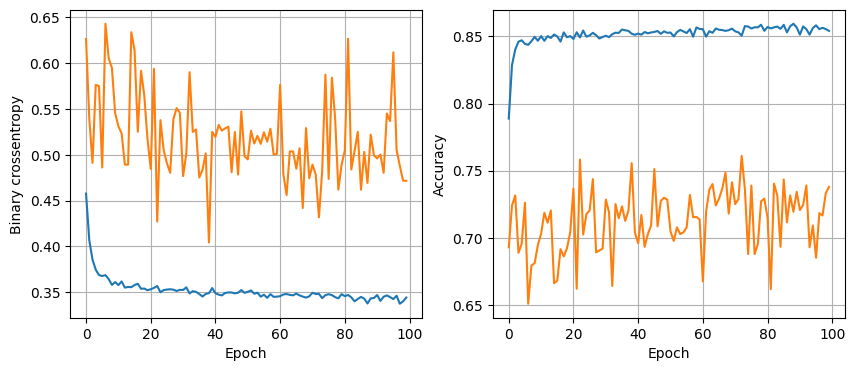

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8662 - loss: 0.3215
16 nodes, dropout 0.2, lr 0.01, batch size 128


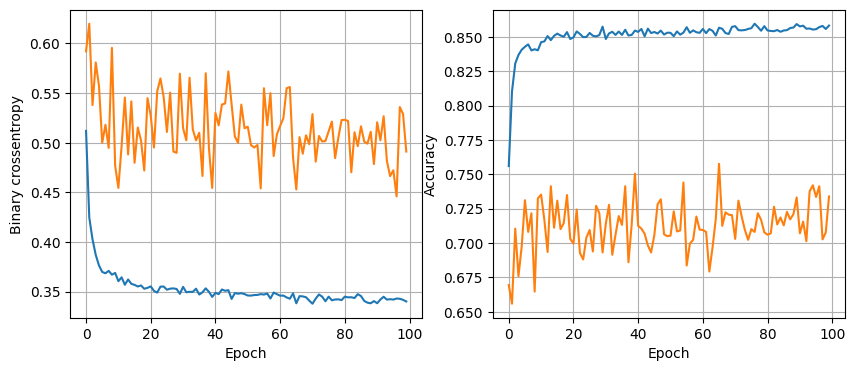

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8663 - loss: 0.3233
16 nodes, dropout 0.2, lr 0.005, batch size 32


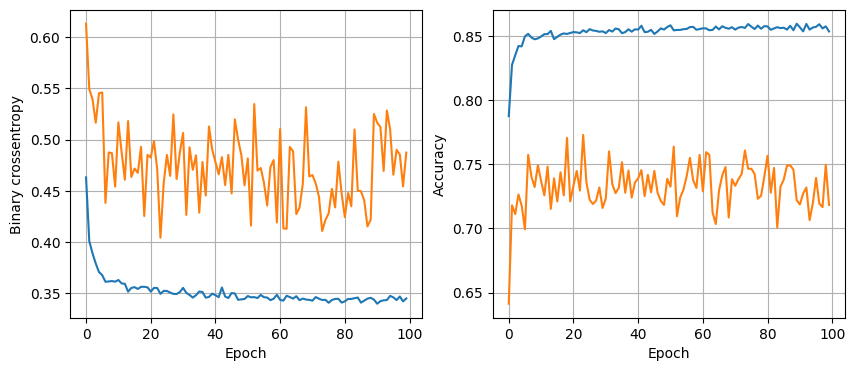

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8564 - loss: 0.3313
16 nodes, dropout 0.2, lr 0.005, batch size 64


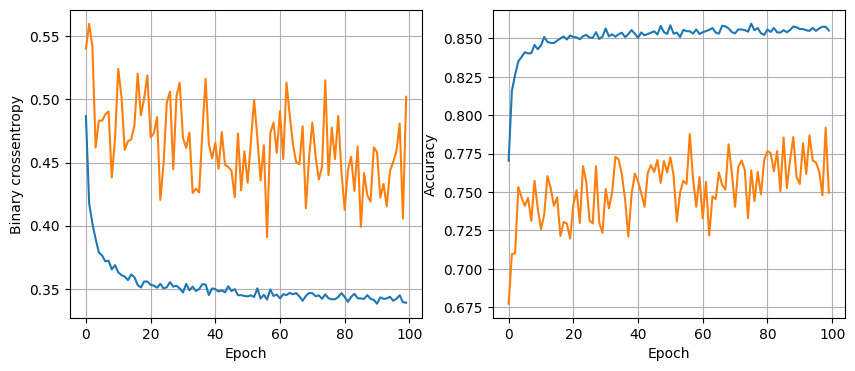

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.3322
16 nodes, dropout 0.2, lr 0.005, batch size 128


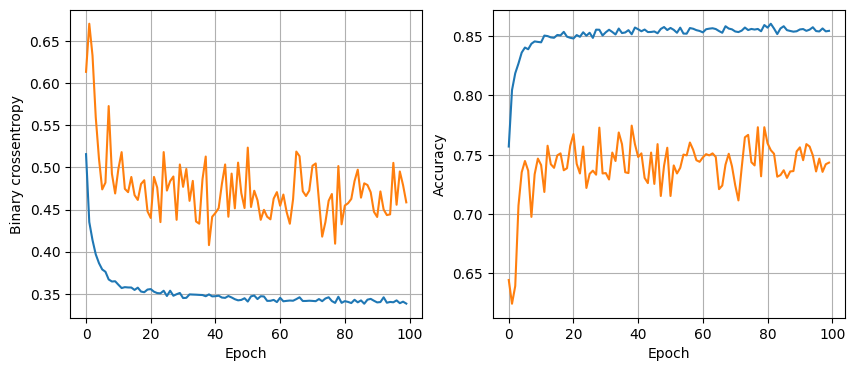

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.3303
16 nodes, dropout 0.2, lr 0.001, batch size 32


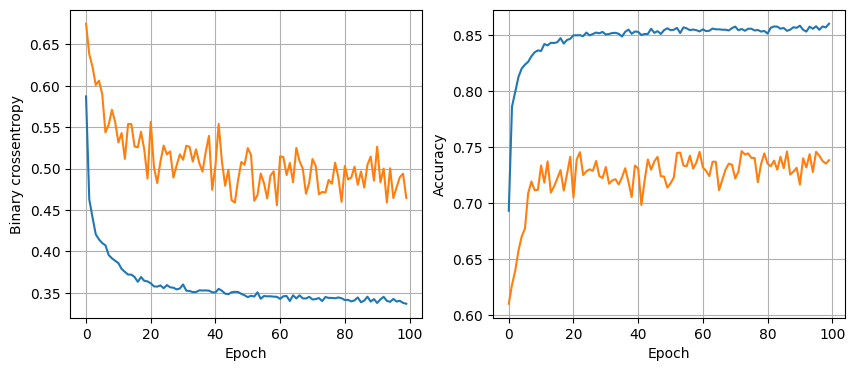

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8625 - loss: 0.3273
16 nodes, dropout 0.2, lr 0.001, batch size 64


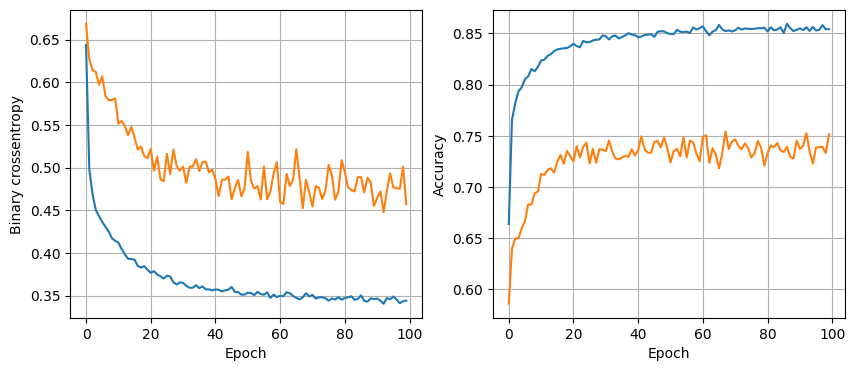

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3333
16 nodes, dropout 0.2, lr 0.001, batch size 128


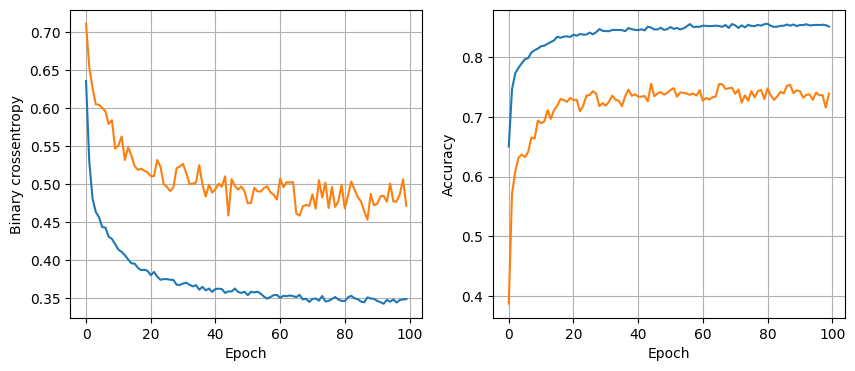

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8646 - loss: 0.3259
32 nodes, dropout 0, lr 0.01, batch size 32


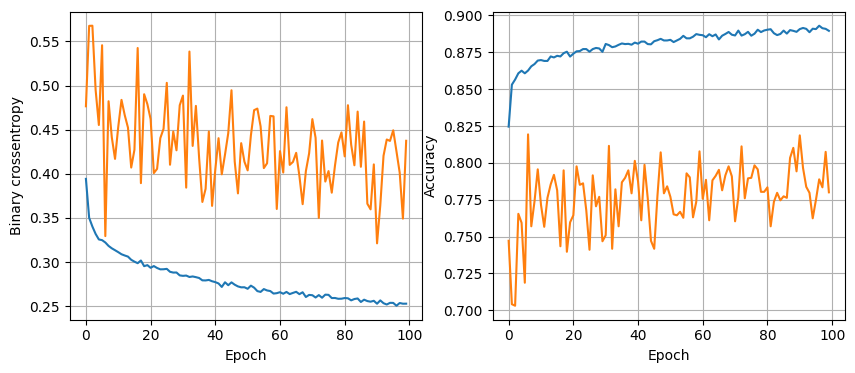

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8604 - loss: 0.3760
32 nodes, dropout 0, lr 0.01, batch size 64


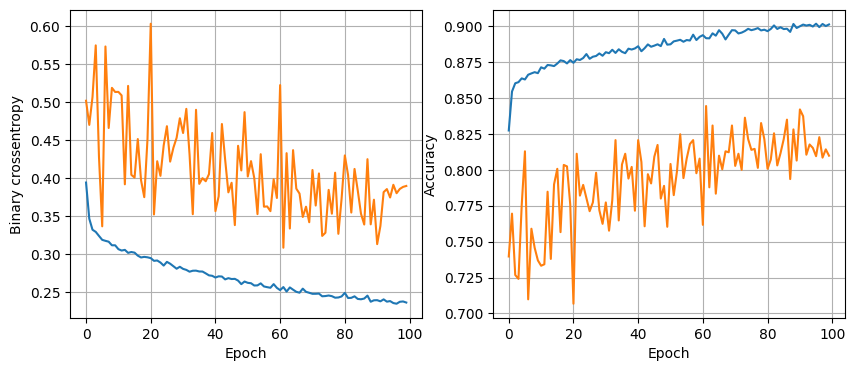

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.3641
32 nodes, dropout 0, lr 0.01, batch size 128


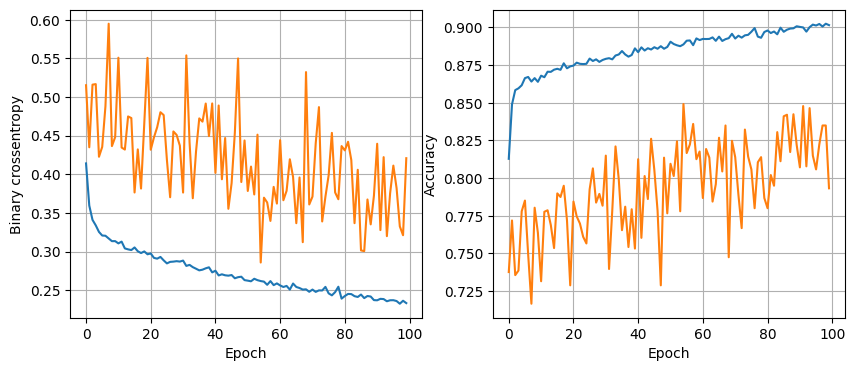

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8638 - loss: 0.3901
32 nodes, dropout 0, lr 0.005, batch size 32


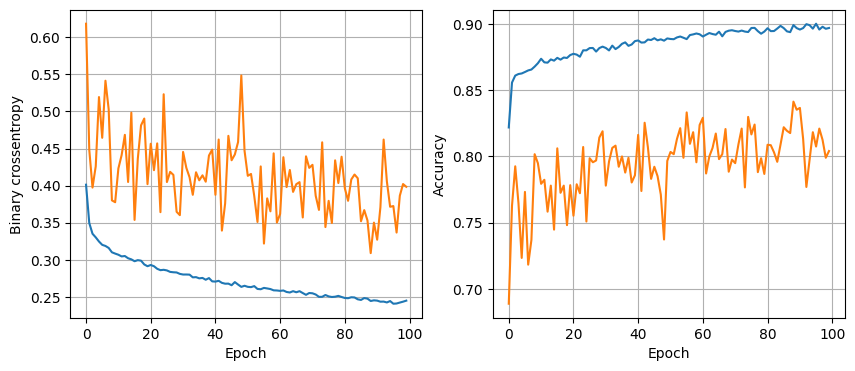

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8609 - loss: 0.3635
32 nodes, dropout 0, lr 0.005, batch size 64


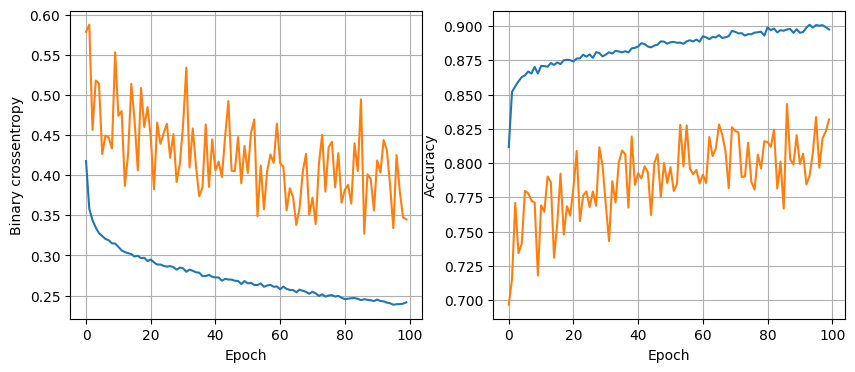

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.3712
32 nodes, dropout 0, lr 0.005, batch size 128


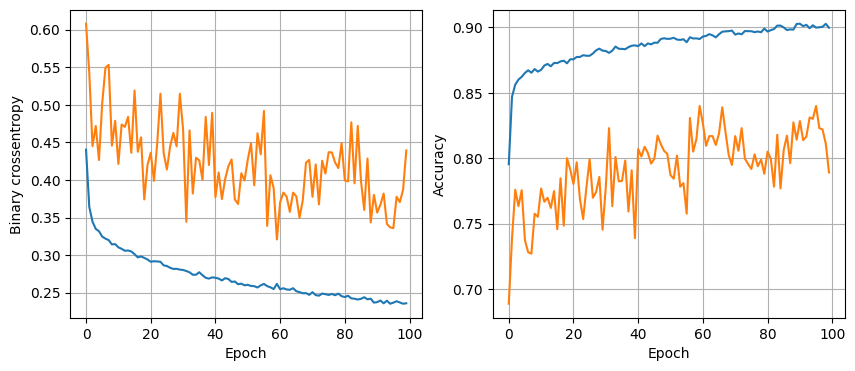

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3640
32 nodes, dropout 0, lr 0.001, batch size 32


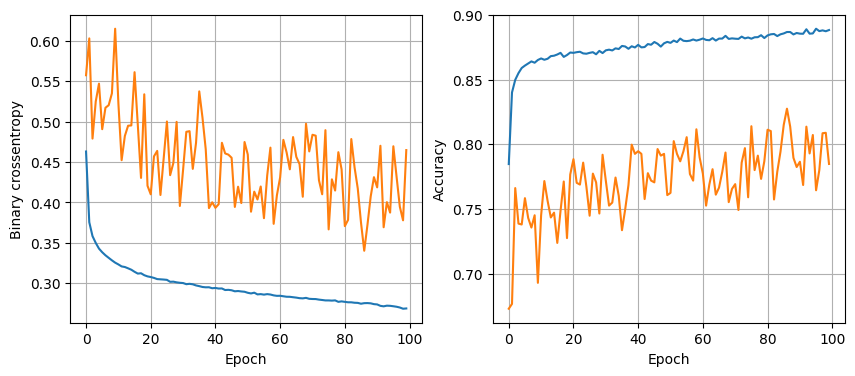

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8710 - loss: 0.3333
32 nodes, dropout 0, lr 0.001, batch size 64


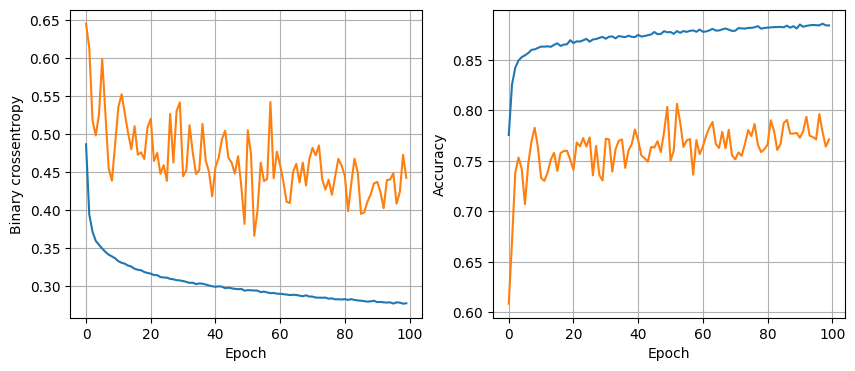

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.3305
32 nodes, dropout 0, lr 0.001, batch size 128


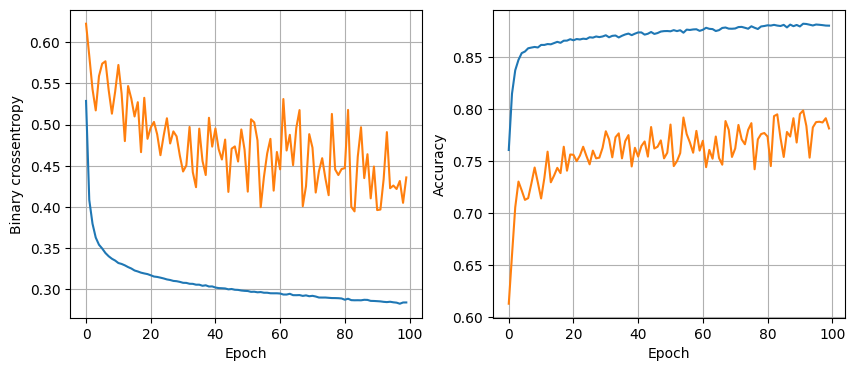

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 - loss: 0.3187
32 nodes, dropout 0.2, lr 0.01, batch size 32


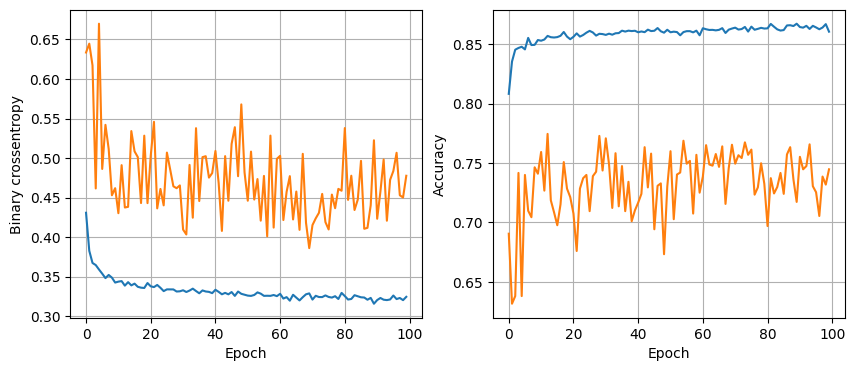

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.3235
32 nodes, dropout 0.2, lr 0.01, batch size 64


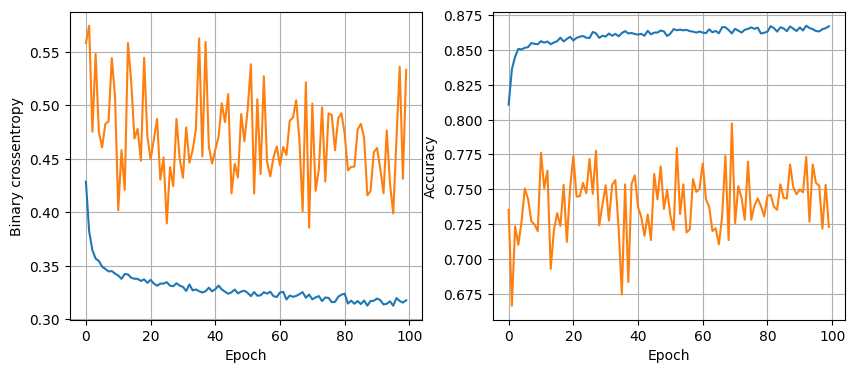

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.3300
32 nodes, dropout 0.2, lr 0.01, batch size 128


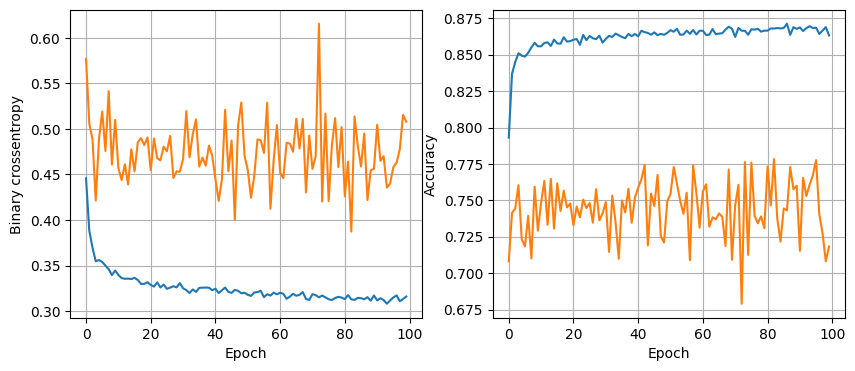

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8622 - loss: 0.3267
32 nodes, dropout 0.2, lr 0.005, batch size 32


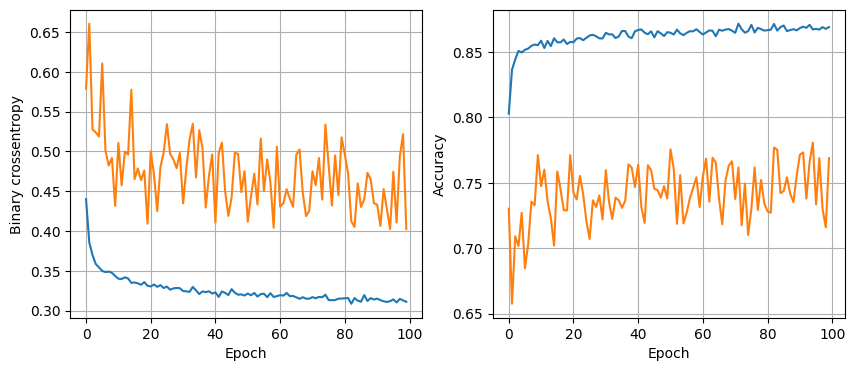

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8696 - loss: 0.3224
32 nodes, dropout 0.2, lr 0.005, batch size 64


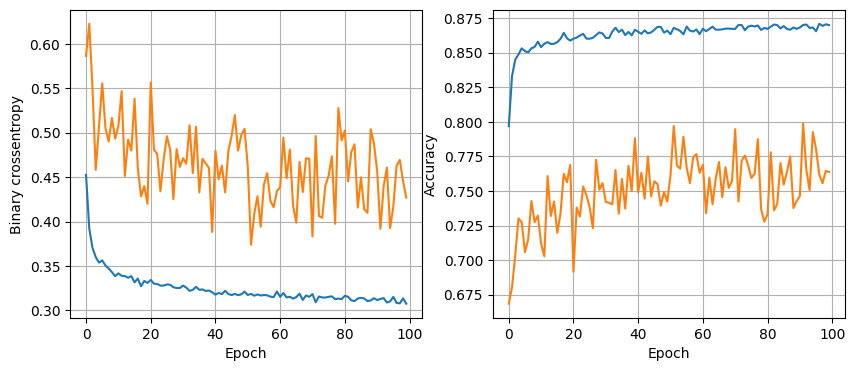

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3160
32 nodes, dropout 0.2, lr 0.005, batch size 128


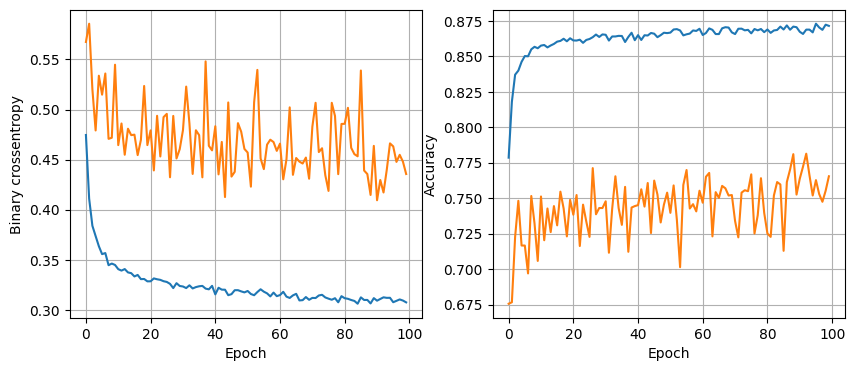

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.3163
32 nodes, dropout 0.2, lr 0.001, batch size 32


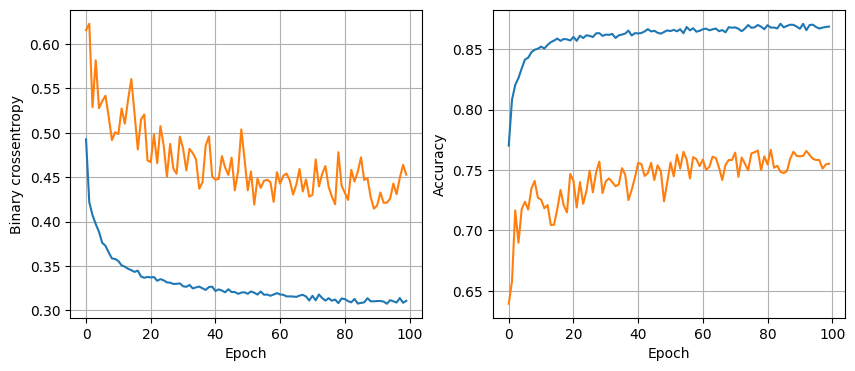

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8718 - loss: 0.3141
32 nodes, dropout 0.2, lr 0.001, batch size 64


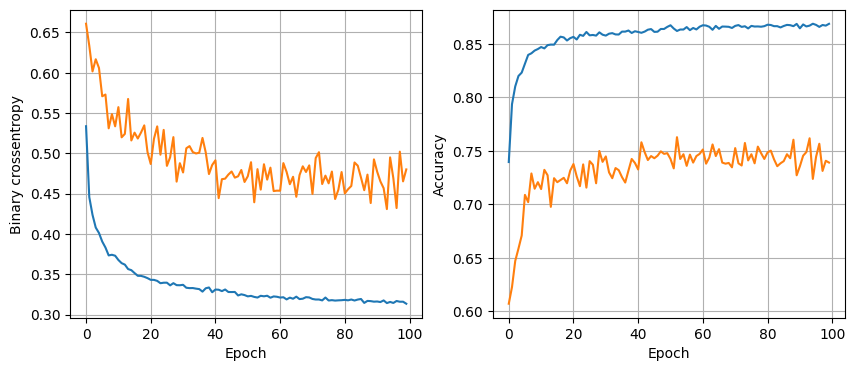

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8699 - loss: 0.3135
32 nodes, dropout 0.2, lr 0.001, batch size 128


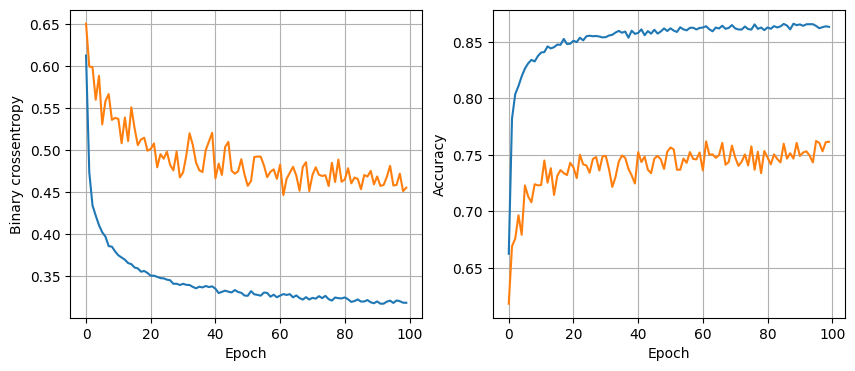

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8697 - loss: 0.3159
64 nodes, dropout 0, lr 0.01, batch size 32


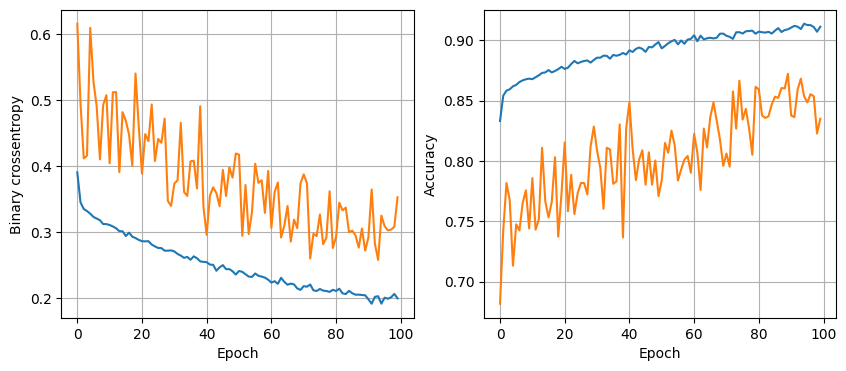

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8619 - loss: 0.4922
64 nodes, dropout 0, lr 0.01, batch size 64


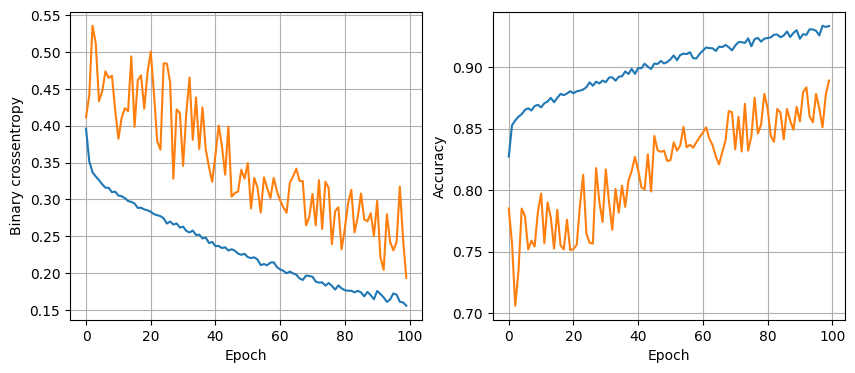

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8570 - loss: 0.5462
64 nodes, dropout 0, lr 0.01, batch size 128


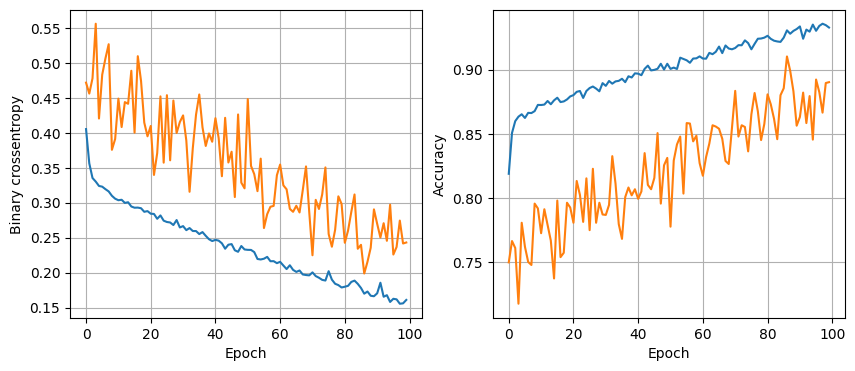

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8635 - loss: 0.5602
64 nodes, dropout 0, lr 0.005, batch size 32


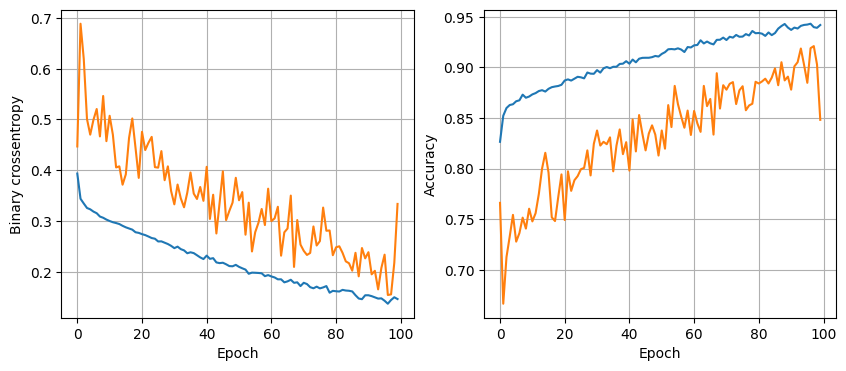

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8528 - loss: 0.6412
64 nodes, dropout 0, lr 0.005, batch size 64


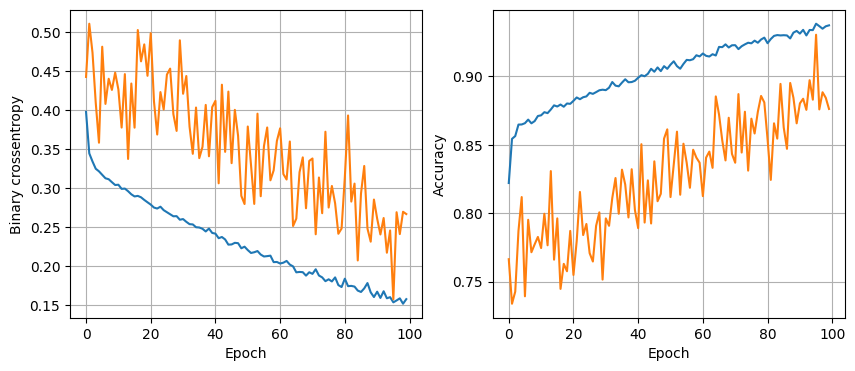

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8565 - loss: 0.5032
64 nodes, dropout 0, lr 0.005, batch size 128


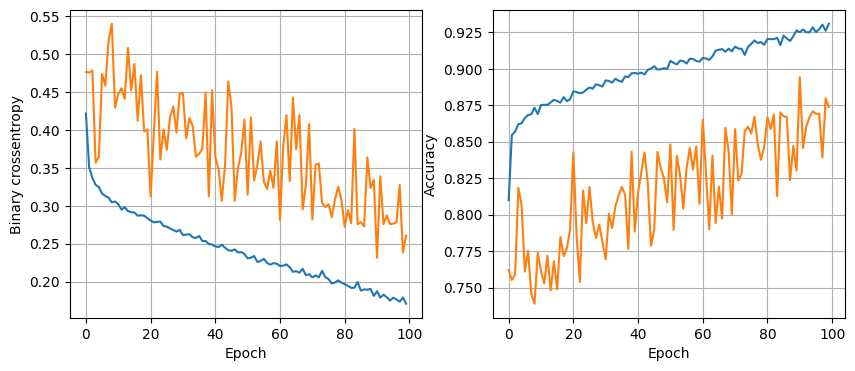

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8482 - loss: 0.4619
64 nodes, dropout 0, lr 0.001, batch size 32


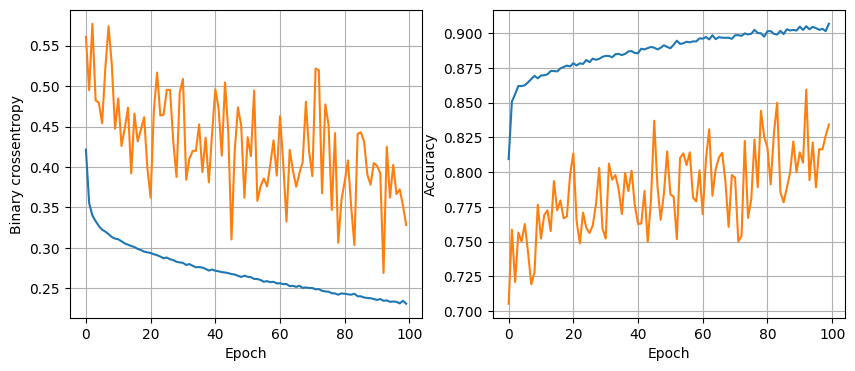

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8594 - loss: 0.3461
64 nodes, dropout 0, lr 0.001, batch size 64


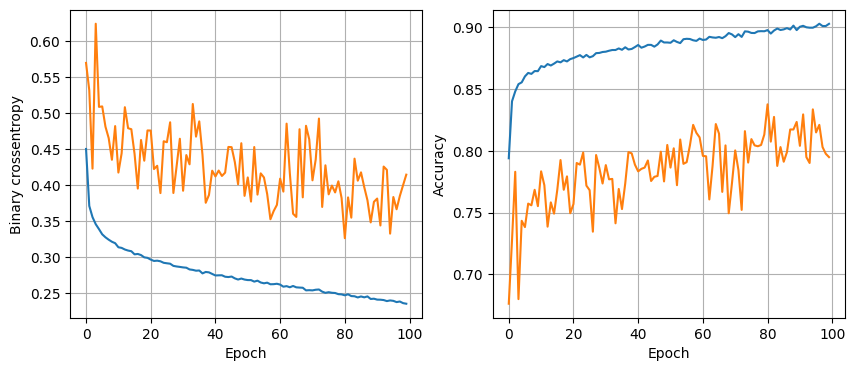

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 - loss: 0.3457
64 nodes, dropout 0, lr 0.001, batch size 128


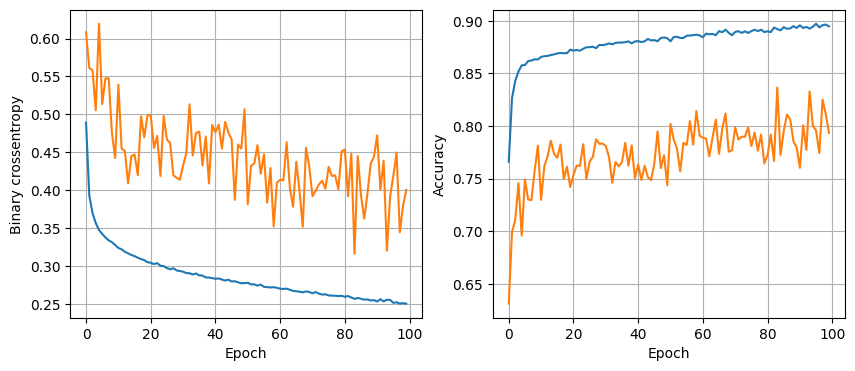

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.3266
64 nodes, dropout 0.2, lr 0.01, batch size 32


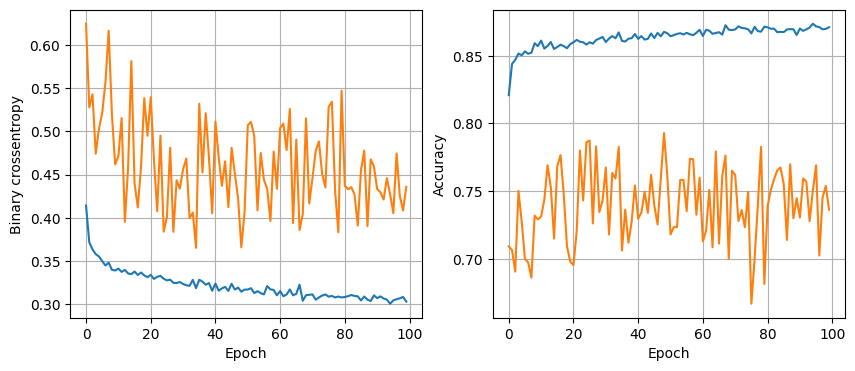

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8624 - loss: 0.3263
64 nodes, dropout 0.2, lr 0.01, batch size 64


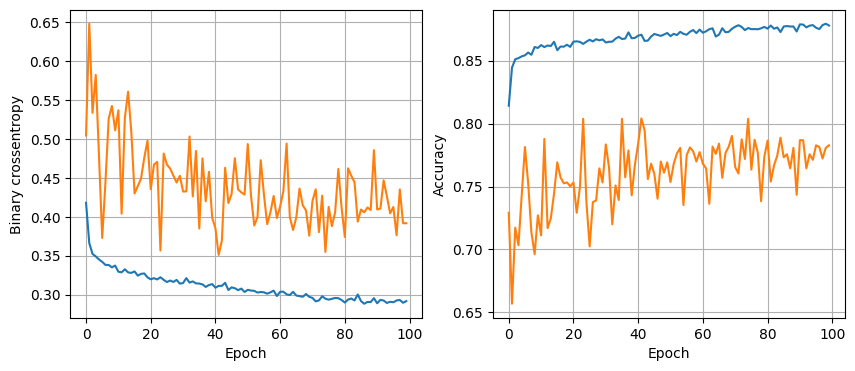

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8682 - loss: 0.3343
64 nodes, dropout 0.2, lr 0.01, batch size 128


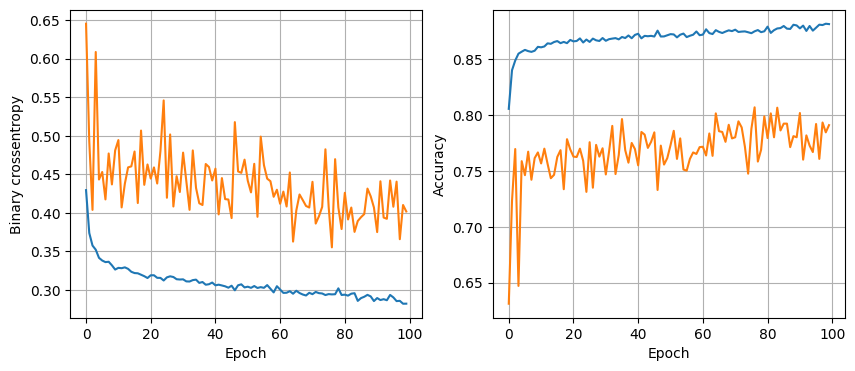

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.3242
64 nodes, dropout 0.2, lr 0.005, batch size 32


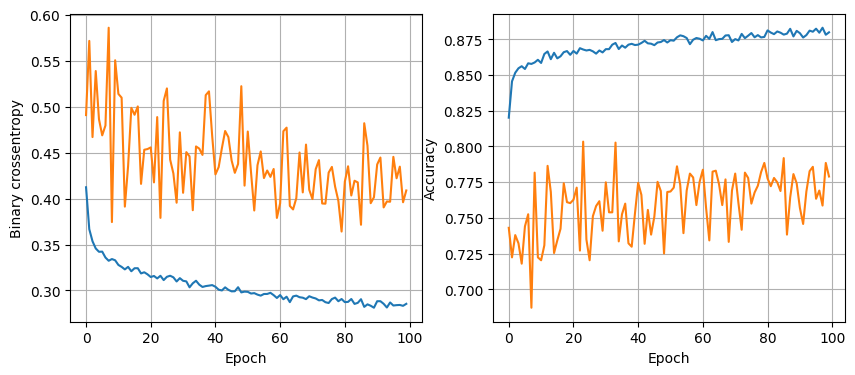

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8774 - loss: 0.3211
64 nodes, dropout 0.2, lr 0.005, batch size 64


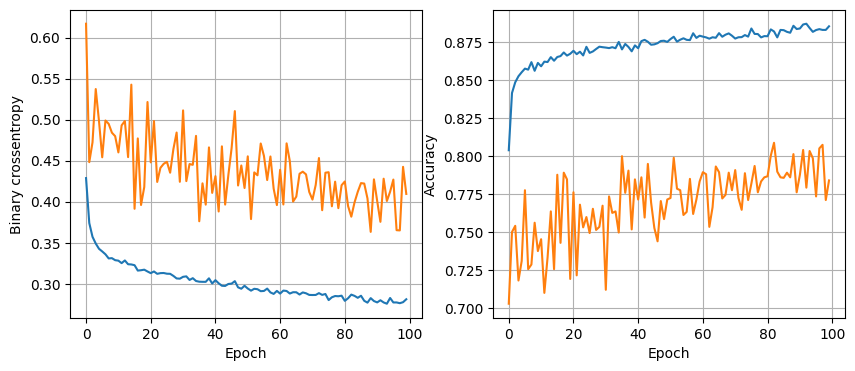

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8768 - loss: 0.3062
64 nodes, dropout 0.2, lr 0.005, batch size 128


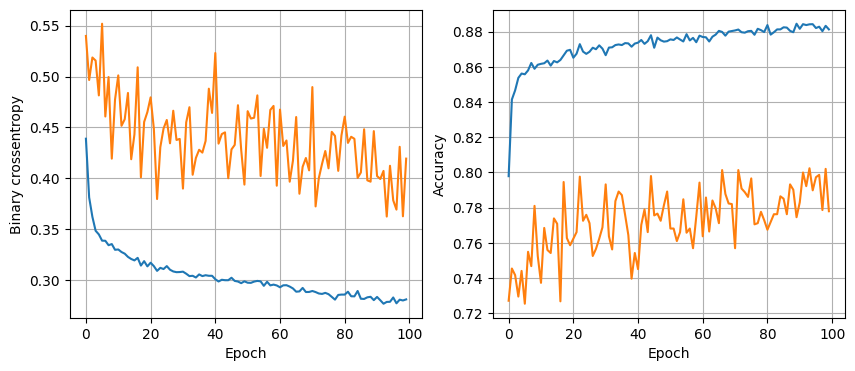

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8680 - loss: 0.3195
64 nodes, dropout 0.2, lr 0.001, batch size 32


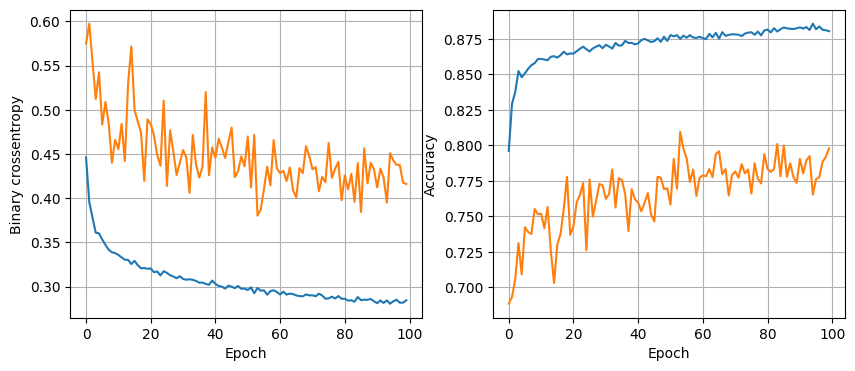

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8743 - loss: 0.3133
64 nodes, dropout 0.2, lr 0.001, batch size 64


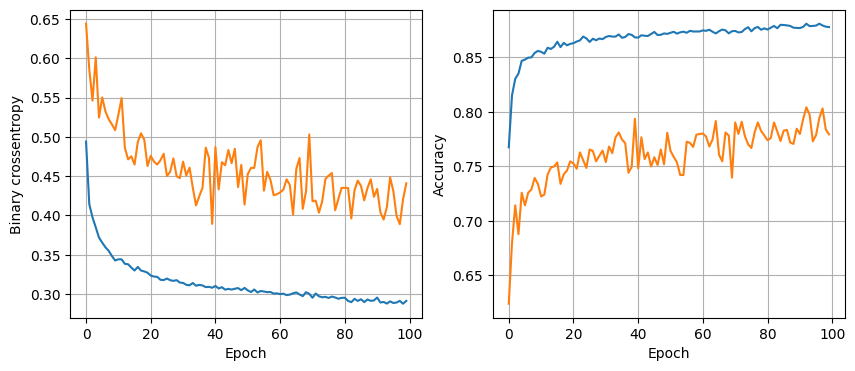

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8692 - loss: 0.3116
64 nodes, dropout 0.2, lr 0.001, batch size 128


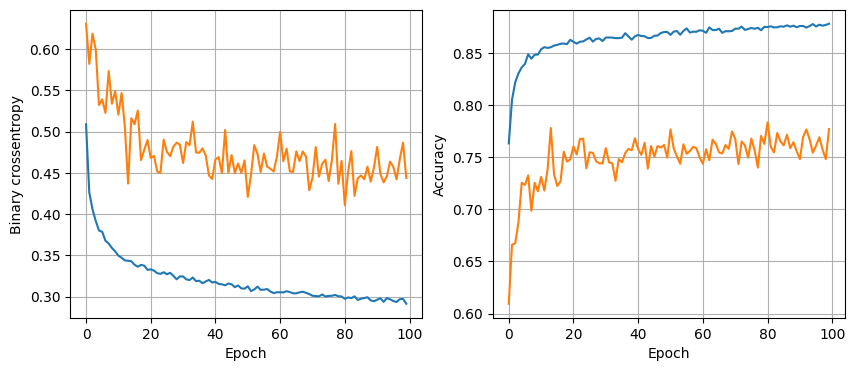

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8704 - loss: 0.3162


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1347
           1       0.88      0.96      0.92      2457

    accuracy                           0.89      3804
   macro avg       0.89      0.86      0.88      3804
weighted avg       0.89      0.89      0.89      3804



## Visualization: 3D surfaces for accuracy and binary crossentropy

This section:
1. Runs a full sweep over *(learning rate, dropout, num_nodes, batch_size)* and exports the results to a data file.
2. Loads the data file and builds interactive 3D surface plots (isometric view) for **validation binary crossentropy** and **validation accuracy**.

> Tip: If you have already run a sweep and exported the data file, you can skip the sweep cell and go straight to the visualization cell.


In [ ]:
# Sweep + export (do not edit earlier cells; this section is self-contained)

import os
from pathlib import Path
import time
import numpy as np
import pandas as pd

# ----------------------------
# 1) Sweep configuration
# ----------------------------
# Discrete hyperparameters (Set A and Set B)
LEARNING_RATES = [0.01, 0.005, 0.001]   # edit if you want different discrete LRs
DROPOUT_PROBS  = [0.0, 0.2]             # edit if you want different discrete dropout values

# Continuous grid axes
NODES_MIN, NODES_MAX = 16, 128
BATCH_MIN, BATCH_MAX = 16, 128

# How many epochs to train each model in the sweep.
# If your notebook already defines `epochs`, we reuse it; otherwise default to 100.
EPOCHS_FOR_SWEEP = globals().get("epochs", 100)

# Export file
EXPORT_PATH = Path("hyperparam_sweep_results.csv")

# Save checkpoints every N runs so you can resume if interrupted
CHECKPOINT_EVERY = 250

# ----------------------------
# 2) Find required objects from earlier notebook cells
# ----------------------------
required_names = [
    "train_model",  # function defined earlier
]
for name in required_names:
    if name not in globals():
        raise NameError(f"Missing `{name}` in globals(). Make sure you executed the earlier cells that define it.")

def _pick_first_existing(*names):
    for n in names:
        if n in globals():
            return n, globals()[n]
    return None, None

# Try common split variable names
xtr_name, X_train_ = _pick_first_existing("X_train", "x_train", "Xtr", "X_train_scaled")
ytr_name, y_train_ = _pick_first_existing("y_train", "Y_train", "ytr", "y_train_scaled")

xva_name, X_valid_ = _pick_first_existing("X_valid", "X_val", "x_valid", "x_val", "X_validation")
yva_name, y_valid_ = _pick_first_existing("y_valid", "y_val", "Y_valid", "Y_val", "y_validation")

if X_train_ is None or y_train_ is None:
    raise NameError("Could not find training data in globals(). Expected something like X_train and y_train.")
if X_valid_ is None or y_valid_ is None:
    raise NameError("Could not find validation data in globals(). Expected something like X_valid/y_valid or X_val/y_val.")

print(f"Using train split: {xtr_name}, {ytr_name}")
print(f"Using valid split: {xva_name}, {yva_name}")

# ----------------------------
# 3) Run sweep (resumable) and export
# ----------------------------
def _history_last(history, key_candidates):
    if history is None or not hasattr(history, "history"):
        return np.nan
    h = history.history
    for k in key_candidates:
        if k in h and len(h[k]) > 0:
            return float(h[k][-1])
    return np.nan

def run_full_sweep(export_path: Path = EXPORT_PATH) -> pd.DataFrame:
    # Load existing progress if present
    if export_path.exists():
        df_existing = pd.read_csv(export_path)
        done = set(
            zip(
                df_existing["lr"].astype(float),
                df_existing["dropout"].astype(float),
                df_existing["num_nodes"].astype(int),
                df_existing["batch_size"].astype(int),
            )
        )
        print(f"Found existing export with {len(df_existing):,} rows. Will resume and skip completed runs.")
    else:
        df_existing = pd.DataFrame()
        done = set()

    rows = []
    total_runs = (len(LEARNING_RATES) * len(DROPOUT_PROBS) *
                  (NODES_MAX - NODES_MIN + 1) * (BATCH_MAX - BATCH_MIN + 1))
    started = time.time()
    run_count = 0

    for lr in LEARNING_RATES:
        for dropout_prob in DROPOUT_PROBS:
            for num_nodes in range(NODES_MIN, NODES_MAX + 1):
                for batch_size in range(BATCH_MIN, BATCH_MAX + 1):
                    key = (float(lr), float(dropout_prob), int(num_nodes), int(batch_size))
                    if key in done:
                        continue

                    # Train
                    model, history = train_model(
                        X_train_, y_train_,
                        num_nodes=num_nodes,
                        dropout_prob=dropout_prob,
                        lr=lr,
                        batch_size=batch_size,
                        epochs=EPOCHS_FOR_SWEEP,
                    )

                    # Evaluate on validation set (loss, accuracy)
                    val_loss, val_acc = model.evaluate(X_valid_, y_valid_, verbose=0)

                    # Pull last-epoch train metrics (best effort)
                    train_loss = _history_last(history, ["loss"])
                    train_acc  = _history_last(history, ["accuracy", "acc"])

                    rows.append({
                        "lr": lr,
                        "dropout": dropout_prob,
                        "num_nodes": num_nodes,
                        "batch_size": batch_size,
                        "train_loss": train_loss,
                        "train_accuracy": train_acc,
                        "val_loss": float(val_loss),
                        "val_accuracy": float(val_acc),
                        "epochs": int(EPOCHS_FOR_SWEEP),
                    })

                    run_count += 1

                    # Periodic checkpoint
                    if run_count % CHECKPOINT_EVERY == 0:
                        df_new = pd.DataFrame(rows)
                        if not df_existing.empty:
                            df_out = pd.concat([df_existing, df_new], ignore_index=True)
                        else:
                            df_out = df_new
                        df_out.to_csv(export_path, index=False)
                        print(f"Checkpoint: wrote {len(df_out):,} rows to {export_path} "
                              f"({(time.time()-started)/60:.1f} min elapsed).")
                        # refresh existing + done set
                        df_existing = df_out
                        done = set(
                            zip(
                                df_existing["lr"].astype(float),
                                df_existing["dropout"].astype(float),
                                df_existing["num_nodes"].astype(int),
                                df_existing["batch_size"].astype(int),
                            )
                        )
                        rows = []

    # Final write
    df_new = pd.DataFrame(rows)
    if not df_existing.empty:
        df_out = pd.concat([df_existing, df_new], ignore_index=True)
    else:
        df_out = df_new
    df_out.to_csv(export_path, index=False)
    print(f"Done. Wrote {len(df_out):,} rows to {export_path}.")
    return df_out

# Run the sweep
df_sweep = run_full_sweep(EXPORT_PATH)
df_sweep.head()


Using train split: X_train, y_train
Using valid split: X_valid, y_valid


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Load exported data + interactive 3D surface visualizations (isometric view)

import numpy as np
import pandas as pd

# Plotly gives interactive 3D plots inside notebooks
import plotly.graph_objects as go

try:
    import ipywidgets as widgets
    from IPython.display import display
    HAS_WIDGETS = True
except Exception:
    HAS_WIDGETS = False

EXPORT_PATH = globals().get("EXPORT_PATH", "hyperparam_sweep_results.csv")
df = pd.read_csv(EXPORT_PATH)

# Ensure expected dtypes
df["lr"] = df["lr"].astype(float)
df["dropout"] = df["dropout"].astype(float)
df["num_nodes"] = df["num_nodes"].astype(int)
df["batch_size"] = df["batch_size"].astype(int)

def _grid_surface(df_sub: pd.DataFrame, value_col: str):
    # Pivot into a nodes x batch grid
    pivot = df_sub.pivot_table(
        index="num_nodes",
        columns="batch_size",
        values=value_col,
        aggfunc="mean",
    ).sort_index().sort_index(axis=1)

    # Reindex to full continuous axes (16..128 step 1)
    nodes_idx = np.arange(pivot.index.min(), pivot.index.max() + 1)
    batch_idx = np.arange(pivot.columns.min(), pivot.columns.max() + 1)
    pivot = pivot.reindex(index=nodes_idx, columns=batch_idx)

    # Make the surface "continuous" by interpolating missing values (2D pass)
    pivot = pivot.interpolate(axis=0, limit_direction="both")
    pivot = pivot.interpolate(axis=1, limit_direction="both")

    X = pivot.columns.values  # batch axis
    Y = pivot.index.values    # nodes axis
    Z = pivot.values
    return X, Y, Z

def make_surface_plot(lr: float, dropout: float, metric: str):
    metric_map = {
        "val_loss": ("Validation Binary Crossentropy", "val_loss"),
        "val_accuracy": ("Validation Accuracy", "val_accuracy"),
        "train_loss": ("Train Binary Crossentropy", "train_loss"),
        "train_accuracy": ("Train Accuracy", "train_accuracy"),
    }
    title, col = metric_map[metric]

    df_sub = df[(df["lr"] == lr) & (df["dropout"] == dropout)]
    if df_sub.empty:
        raise ValueError("No data for the selected lr/dropout. Did you run the sweep for these values?")

    X, Y, Z = _grid_surface(df_sub, col)

    # Surface with heatmap coloring based on height
    fig = go.Figure(
        data=[go.Surface(
            x=X,
            y=Y,
            z=Z,
            surfacecolor=Z,  # heatmap by height
            showscale=True
        )]
    )

    fig.update_layout(
        title=f"{title} | lr={lr} | dropout={dropout}",
        scene=dict(
            xaxis_title="Batch Size",
            yaxis_title="Num Nodes",
            zaxis_title=title,
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),  # isometric-ish
        ),
        height=700,
        margin=dict(l=0, r=0, t=40, b=0),
    )
    return fig

lrs = sorted(df["lr"].unique().tolist())
drops = sorted(df["dropout"].unique().tolist())

default_lr = lrs[0] if lrs else 0.001
default_drop = drops[0] if drops else 0.0

if HAS_WIDGETS:
    lr_dd = widgets.Dropdown(options=lrs, value=default_lr, description="LR:")
    dr_dd = widgets.Dropdown(options=drops, value=default_drop, description="Dropout:")
    met_dd = widgets.Dropdown(
        options=[
            ("Validation Binary Crossentropy", "val_loss"),
            ("Validation Accuracy", "val_accuracy"),
            ("Train Binary Crossentropy", "train_loss"),
            ("Train Accuracy", "train_accuracy"),
        ],
        value="val_loss",
        description="Metric:"
    )

    out = widgets.Output()

    def _update(*args):
        out.clear_output(wait=True)
        with out:
            fig = make_surface_plot(lr_dd.value, dr_dd.value, met_dd.value)
            fig.show()

    lr_dd.observe(_update, names="value")
    dr_dd.observe(_update, names="value")
    met_dd.observe(_update, names="value")

    display(widgets.HBox([lr_dd, dr_dd, met_dd]))
    display(out)
    _update()
else:
    # Fallback: render all plots for each (lr, dropout) pair
    for lr in lrs:
        for d in drops:
            for metric in ["val_loss", "val_accuracy"]:
                fig = make_surface_plot(lr, d, metric)
                fig.show()
